<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/Romania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [2]:


# Sample Romania map data with custom node positions
romania_map = {
    'graph_dict': {
        'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
        'Zerind': {'Arad': 75, 'Oradea': 71},
        'Oradea': {'Zerind': 71, 'Sibiu': 151},
        'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
        'Timisoara': {'Arad': 118, 'Lugoj': 111},
        'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
        'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
        'Drobeta': {'Mehadia': 75, 'Craiova': 120},
        'Craiova': {'Drobeta': 120, 'Pitesti': 138, 'Rimnicu Vilcea': 146},
        'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
        'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
        'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
        'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
        'Giurgiu': {'Bucharest': 90},
        'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
        'Hirsova': {'Urziceni': 98, 'Eforie': 86},
        'Eforie': {'Hirsova': 86},
        'Vaslui': {'Urziceni': 142, 'Iasi': 92},
        'Iasi': {'Vaslui': 92, 'Neamt': 87},
        'Neamt': {'Iasi': 87}
    },
    'locations': {
        'Arad': (91, 492), 'Zerind': (135, 495), 'Oradea': (200, 490), 'Sibiu': (140, 400),
        'Timisoara': (70, 410), 'Lugoj': (100, 360), 'Mehadia': (120, 310), 'Drobeta': (130, 250),
        'Craiova': (220, 200), 'Rimnicu Vilcea': (180, 320), 'Fagaras': (220, 400),
        'Pitesti': (250, 300), 'Bucharest': (350, 200), 'Giurgiu': (370, 150), 'Urziceni': (400, 210),
        'Hirsova': (460, 240), 'Eforie': (475, 150), 'Vaslui': (490, 300), 'Iasi': (470, 350),
        'Neamt': (450, 400)
    }
}




In [3]:
node_colors = {node: 'white' for node in romania_map['locations'].keys()}
node_positions = romania_map['locations']
node_label_positions = {k: [v[0], v[1] - 10] for k, v in romania_map['locations'].items()}
edge_weights = {(k, k2): v2 for k, v in romania_map['graph_dict'].items() for k2, v2 in v.items()}

romania_graph_data = {
    'graph_dict': romania_map['graph_dict'],
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_positions,
    'edge_weights': edge_weights
}

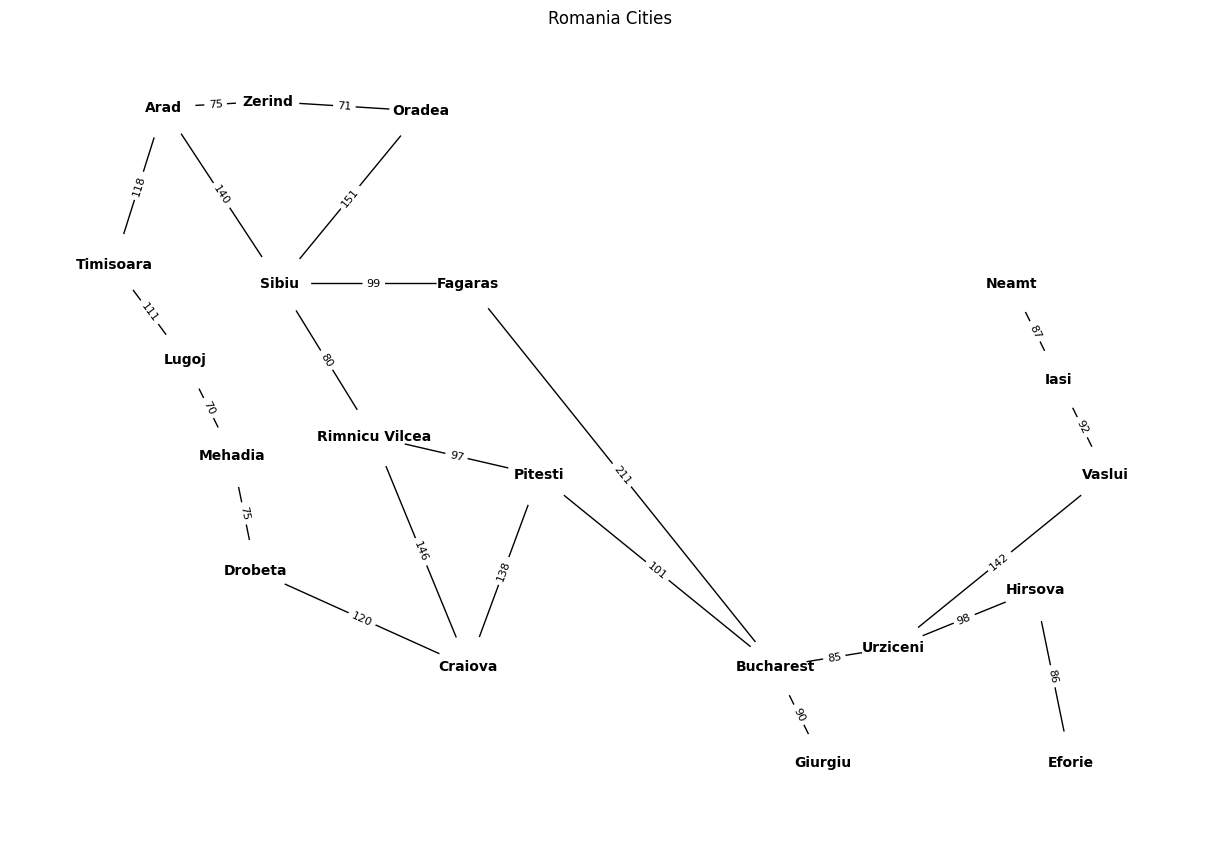

In [4]:
# Create the graph
graph = nx.Graph()
for node, neighbors in romania_graph_data['graph_dict'].items():
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(graph,
        pos=romania_graph_data['node_positions'],
        with_labels=True,
        node_size=2000,
        node_color=list(romania_graph_data['node_colors'].values()),
        font_size=10,
        font_weight='bold',
        edge_color='black')

# Add edge labels for weights
nx.draw_networkx_edge_labels(
    graph,
    pos=romania_graph_data['node_positions'],
    edge_labels=romania_graph_data['edge_weights'],
    font_size=8
)

plt.title("Romania Cities")
plt.show()


In [13]:
class BestFirstSearch:
    def __init__(self, graph, f):
        """
        Initialize the search.
        :param graph: The graph as a dictionary of nodes and neighbors.
        :param f: Function to calculate f(n), which guides the search.
        """
        self.graph = graph
        self.f = f
        self.cost_so_far = {}  # Tracks cumulative costs for Dijkstra

    def search(self, start, goal):
        """
        Perform the best-first search.
        :param start: Starting node.
        :param goal: Goal node.
        :return: List of nodes representing the path from start to goal.
        """
        open_set = []
        self.cost_so_far[start] = 0
        heapq.heappush(open_set, (self.f(start, 0, self.cost_so_far), start, 0))
        came_from = {start: None}
        visited = set()
        visited_order = []

        while open_set:
            _, current, depth = heapq.heappop(open_set)

            if current in visited:
                continue

            visited.add(current)
            visited_order.append(current)

            if current == goal:
                return self.reconstruct_path(came_from, current), visited_order

            for neighbor, weight in self.graph[current].items():
                new_cost = self.cost_so_far[current] + weight
                if neighbor not in self.cost_so_far or new_cost < self.cost_so_far[neighbor]:
                    self.cost_so_far[neighbor] = new_cost
                    heapq.heappush(open_set, (self.f(neighbor, depth + 1, self.cost_so_far), neighbor, depth + 1))
                    came_from[neighbor] = current

        return None, visited_order

    def reconstruct_path(self, came_from, current):
        """
        Reconstruct the path from start to goal.
        :param came_from: Dictionary of predecessors.
        :param current: Goal node.
        :return: Path as a list of nodes.
        """
        path = []
        while current:
            path.append(current)
            current = came_from[current]
        return path[::-1]


In [15]:
def visualize_search(graph_data, path, visited_nodes):
    """
    Visualize the search on the graph.
    :param graph_data: Data containing node positions and graph info.
    :param path: The path found by the search.
    :param visited_nodes: The nodes visited during the search.
    """
    graph = nx.Graph()
    for node, neighbors in graph_data['graph_dict'].items():
        for neighbor, weight in neighbors.items():
            graph.add_edge(node, neighbor, weight=weight)

    plt.figure(figsize=(12, 8))

    # Highlight visited nodes
    node_colors = graph_data['node_colors'].copy()
    for node in visited_nodes:
        if node in node_colors:
            node_colors[node] = 'yellow'  # Mark as visited
        else:
            print(f"Warning: {node} not found in node_colors!")  # Debugging

    # Highlight the path
    path_edges = list(zip(path, path[1:]))
    edge_colors = ['green' if edge in path_edges else 'black' for edge in graph.edges()]

    # Draw nodes and edges
    nx.draw(
        graph,
        pos=graph_data['node_positions'],
        node_color=[node_colors.get(node, 'white') for node in graph.nodes()],
        with_labels=True,
        node_size=2000,
        font_weight='bold',
        font_size=10,
        edge_color=edge_colors
    )

    # Draw edge labels for weights
    nx.draw_networkx_edge_labels(
        graph,
        pos=graph_data['node_positions'],
        edge_labels=graph_data['edge_weights'],
        font_size=8
    )

    plt.title("Search Progress")
    plt.show()


Path found: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Visited nodes in order: ['Arad', 'Sibiu', 'Timisoara', 'Zerind', 'Fagaras', 'Lugoj', 'Oradea', 'Rimnicu Vilcea', 'Bucharest']


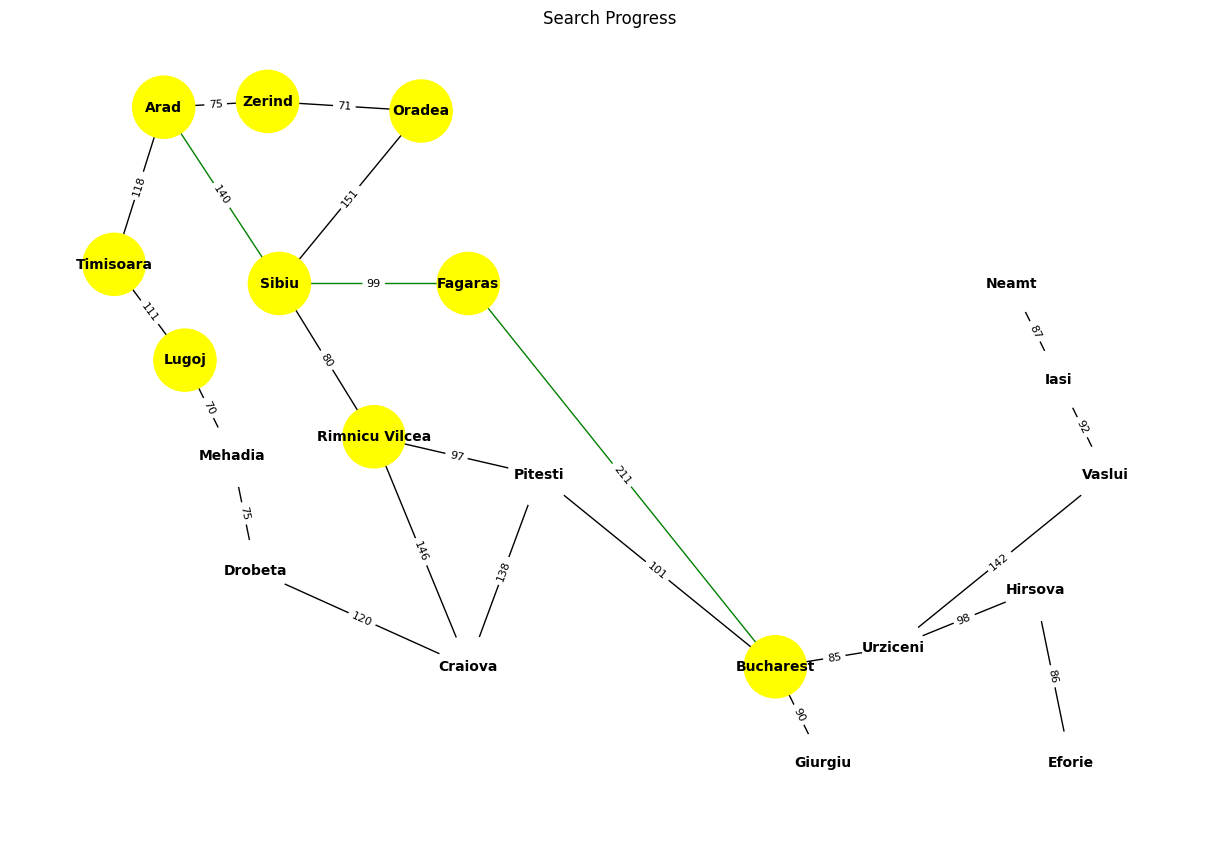

In [16]:
# Define f(n) as depth of the node with an additional unused third argument
def f_depth(node, depth, cost_so_far):
    return depth


# Run the search
bfs = BestFirstSearch(romania_map['graph_dict'], f=f_depth)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize search progress
visualize_search(romania_graph_data, path, visited_nodes)

In [17]:
print("Visited nodes:", visited_nodes)


Visited nodes: ['Arad', 'Sibiu', 'Timisoara', 'Zerind', 'Fagaras', 'Lugoj', 'Oradea', 'Rimnicu Vilcea', 'Bucharest']


In [19]:
# Define f(n) for Dijkstra's algorithm
def f_dijkstra(node, depth, cost_so_far):
    """
    Dijkstra's cost function.
    :param node: Current node being evaluated.
    :param depth: Current depth (not used in Dijkstra's).
    :param cost_so_far: Dictionary of cumulative costs so far.
    :return: Total cost to reach this node.
    """
    return cost_so_far.get(node, float('inf'))


Path found: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Visited nodes in order: ['Arad', 'Zerind', 'Timisoara', 'Sibiu', 'Oradea', 'Rimnicu Vilcea', 'Lugoj', 'Fagaras', 'Mehadia', 'Pitesti', 'Craiova', 'Drobeta', 'Bucharest']


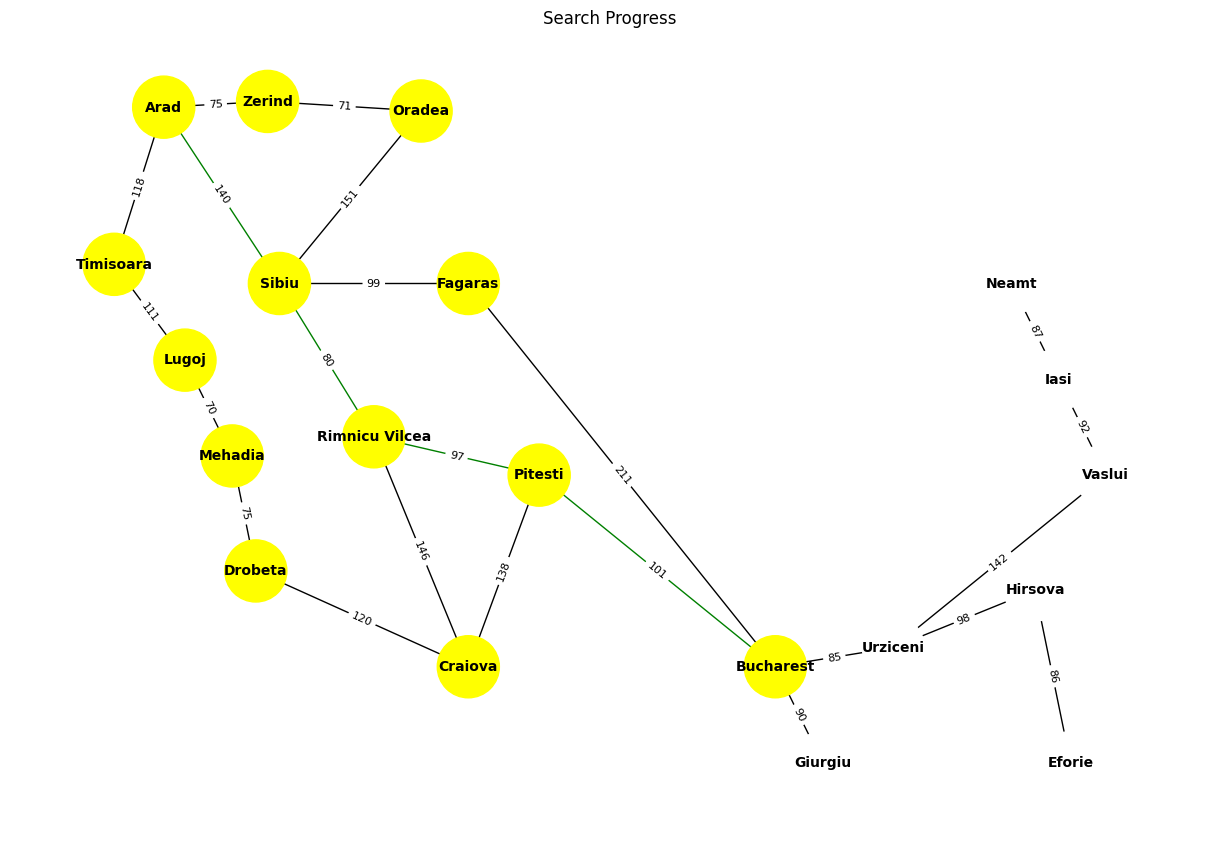

In [20]:
# Run Dijkstra's search using the BestFirstSearch class
bfs_dijkstra = BestFirstSearch(romania_map['graph_dict'], f=f_dijkstra)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs_dijkstra.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize the search progress
visualize_search(romania_graph_data, path, visited_nodes)
